# Assignment 3.2
Nayan Ranjan Das

A2305220148 | 5CSE2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector as sfs

In [5]:
df = pd.read_csv('iris-1.csv')
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [6]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

# Answer 1 (i)

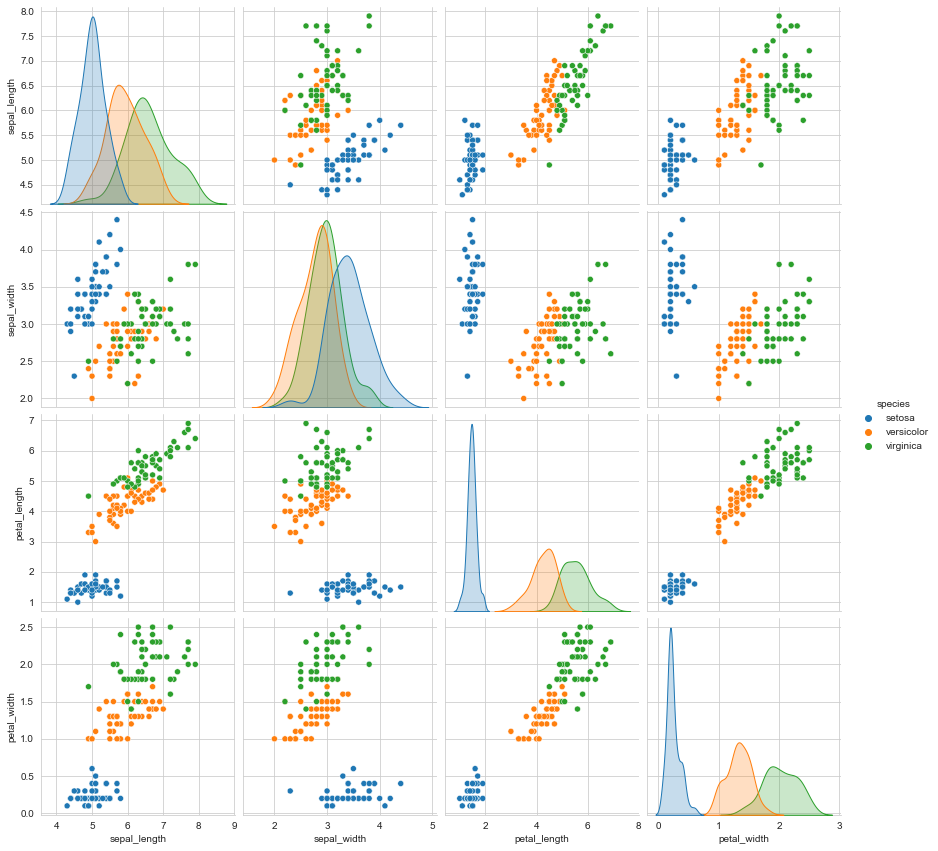

In [7]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='species', height=3)

- petal_length along with any other feature seems to be the most useful features to identify various flower types
- white setosa can be easily identified, it is linearly separable
- virginica and versicolor have some overlap, which are almost linearly separable

# Answer 1 (ii)

In [8]:
df = df.replace(to_replace=['setosa', 'versicolor', 'virginica'], value=[0,1,2])
sc_x = StandardScaler()
x = pd.DataFrame(sc_x.fit_transform(df.drop(['species'], axis=1),),
                columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
X = x
X

sepal_length  sepal_width  petal_length  petal_width
0       -0.900681     1.032057     -1.341272    -1.312977
1       -1.143017    -0.124958     -1.341272    -1.312977
2       -1.385353     0.337848     -1.398138    -1.312977
3       -1.506521     0.106445     -1.284407    -1.312977
4       -1.021849     1.263460     -1.341272    -1.312977
..            ...          ...           ...          ...
145      1.038005    -0.124958      0.819624     1.447956
146      0.553333    -1.281972      0.705893     0.922064
147      0.795669    -0.124958      0.819624     1.053537
148      0.432165     0.800654      0.933356     1.447956
149      0.068662    -0.124958      0.762759     0.790591

[150 rows x 4 columns]

In [9]:
x = x.join(df['species'])
y = df['species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

# Answer 1 (iii)

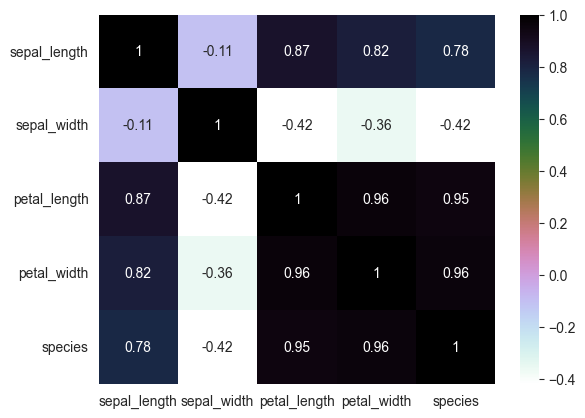

In [10]:
plt.figure()
p = sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r')

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=52)
lr = LogisticRegression()
_sfs = sfs(lr, n_features_to_select=2, direction='forward', scoring='accuracy')
_sfs = _sfs.fit(x_train, y_train)
feat_names = list(_sfs.get_feature_names_out())
print(feat_names)
lr.fit(x_train, y_train)

['sepal_length', 'species']


LogisticRegression()

In [17]:
pred = lr.predict(x_test)
pred = np.round(pred)
pred = np.reshape(pred, (30))
print(f'Accuracy = {accuracy_score(pred, y_test)}')

Accuracy = 1.0


# Answer 2

`Accuracy = (TN + TP) / (TN + FP + TP + FN)`

`Sensitivity = TP / (TP + FN)`

`Specificity = TN / (TN + FP)`

`Fl-score = 2TP / (2TP + FP + FN)`

For model-1:
- True Positive (TP): 100 
- True Negative (TN): 200
- False Negative (FN): 20
- False Positive (FP): 30

`Accuracy = 0.8571`

`Sensitivity = 0.8333`

`Specificity = 0.8696`

`Fl-score = 0.8000`

For model-2:
- True Positive (TP): 150
- True Negative (TN): 50 
- False Negative (FN): 50
- False Positive (FP): 100

Accuracy = 0.5714
Sensitivity = 0.7500
Specificity = 0.3333 
Fl-score = 0.6667

Since model-1 has higher accuracy and F1-score, it is better than model-2.